# Week 4 Assignment: Analyzing Clean Energy Power Plants in California (Revised)

Description: This notebook is a revision of last week's assignment to produce maps from a data set that I am working with for the group project. I went to office hours with Chris and asked for help producing a map from the data, which was not working when I had previously tried to run the plot command. Chris helped me understand how a geometry variable is needed in the data set in order to plot it, and we worked together on splicing a geometry variable from a separate data set into the data set I am working with (which did not have this data originally).

In [62]:
#importing geopandas for visualization of data

import geopandas as gpd

In [63]:
#importing census data

clean = gpd.read_file('NAICSclean.csv')

In [64]:
#getting general information about the data set

clean.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GEO_ID           37 non-null     object  
 1   NAME             37 non-null     object  
 2   NAICS2017        37 non-null     object  
 3   NAICS2017_LABEL  37 non-null     object  
 4   NAICS2017_F      37 non-null     object  
 5   LFO              37 non-null     object  
 6   LFO_LABEL        37 non-null     object  
 7   EMPSZES          37 non-null     object  
 8   EMPSZES_LABEL    37 non-null     object  
 9   YEAR             37 non-null     object  
 10  ESTAB            37 non-null     object  
 11  PAYANN           37 non-null     object  
 12  PAYANN_N         37 non-null     object  
 13  PAYQTR1          37 non-null     object  
 14  PAYQTR1_N        37 non-null     object  
 15  EMP              37 non-null     object  
 16  EMP_N            37 non-null     objec

In [65]:
#determining the number of rows and columns in the file

clean.shape

(37, 18)

In [66]:
#examining the first rows of data

clean.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,NAICS2017_F,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,geometry
0,id,Geographic Area Name,2017 NAICS code,Meaning of NAICS code,2017 NAICS Footnote,Legal form of organization code,Meaning of Legal form of organization code,Employment size of establishments,Meaning of Employment size of establishments,Year,Number of establishments,"Annual payroll ($1,000)",Noise range for annual payroll,"First-quarter payroll ($1,000)",Noise range for first-quarter payroll (%),Number of employees,Noise range for number of paid employees for p...,None
1,0500000US06001,"Alameda County, California",221115,Wind electric power generation,null,001,All establishments,001,All establishments,2018,4,5102,G,1779,G,47,G,None
2,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,3,268,G,88,G,5,G,None
3,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,3,N,N,N,N,N,N,None
4,0500000US06013,"Contra Costa County, California",221114,Solar electric power generation,null,001,All establishments,001,All establishments,2018,4,9589,G,2695,H,72,G,None


In [67]:
#dropping the first cell from the data set

clean = clean.drop([0])
clean.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,NAICS2017_F,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,geometry
1,0500000US06001,"Alameda County, California",221115,Wind electric power generation,null,001,All establishments,001,All establishments,2018,4,5102,G,1779,G,47,G,None
2,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,3,268,G,88,G,5,G,None
3,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,3,N,N,N,N,N,N,None
4,0500000US06013,"Contra Costa County, California",221114,Solar electric power generation,null,001,All establishments,001,All establishments,2018,4,9589,G,2695,H,72,G,None
5,0500000US06019,"Fresno County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,4,9552,J,2470,J,100,J,None


In [68]:
# get county boundaries from LA open data
counties = gpd.read_file('https://opendata.arcgis.com/datasets/a61c138d0a6946da8d1ebb8d1c9db13a_0.geojson')
counties.head()

,OBJECTID,COUNTY_NAME,COUNTY_ABBREV,COUNTY_NUM,COUNTY_CODE,COUNTY_FIPS,ISLAND,geometry
0,1,Alameda,ALA,1,01,001,None,"POLYGON ((-122.27125 37.90503, -122.27061 37.9..."
1,2,Alpine,ALP,2,02,003,None,"POLYGON ((-119.58667 38.71420, -119.60704 38.7..."
2,3,Amador,AMA,3,03,005,None,"POLYGON ((-120.07246 38.70276, -120.07267 38.7..."
3,4,Butte,BUT,4,04,007,None,"POLYGON ((-121.07661 39.59729, -121.07660 39.5..."
4,5,Calaveras,CAL,5,05,009,None,"POLYGON ((-120.01792 38.43586, -120.02877 38.4..."


In [69]:
# trim the data to the bare minimum columns
counties = counties[['COUNTY_NAME', 'COUNTY_CODE','COUNTY_FIPS','geometry']]
counties.head()

,COUNTY_NAME,COUNTY_CODE,COUNTY_FIPS,geometry
0,Alameda,01,001,"POLYGON ((-122.27125 37.90503, -122.27061 37.9..."
1,Alpine,02,003,"POLYGON ((-119.58667 38.71420, -119.60704 38.7..."
2,Amador,03,005,"POLYGON ((-120.07246 38.70276, -120.07267 38.7..."
3,Butte,04,007,"POLYGON ((-121.07661 39.59729, -121.07660 39.5..."
4,Calaveras,05,009,"POLYGON ((-120.01792 38.43586, -120.02877 38.4..."


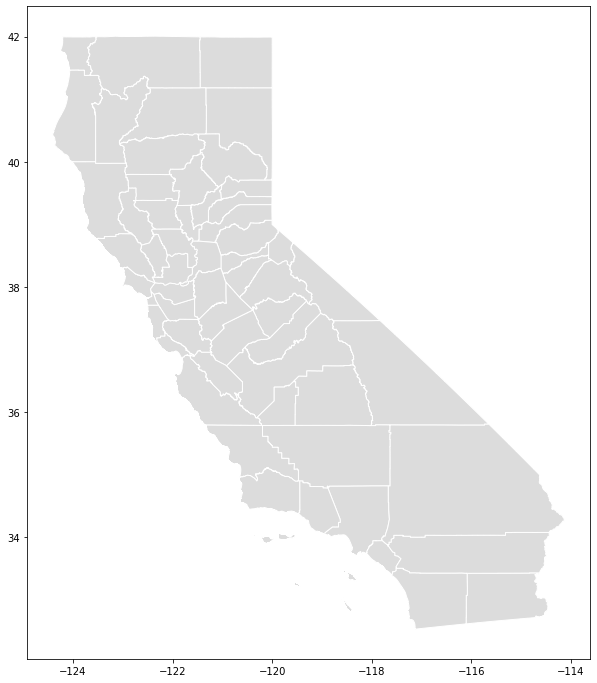

In [70]:
# plot it!
ax=counties.plot(figsize=(12,12),color='gainsboro', edgecolor='white')

In [71]:
# creating new variable, COUNTY_FIPS. it's equal to geo_ID, minus the first string of numbers

clean['COUNTY_FIPS']=clean['GEO_ID'].str.lstrip('0500000US06')

In [72]:
#looking at the data again -- the new variable COUNTY_FIPS is showing up

clean.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,NAICS2017_F,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,geometry,COUNTY_FIPS
1,0500000US06001,"Alameda County, California",221115,Wind electric power generation,null,001,All establishments,001,All establishments,2018,4,5102,G,1779,G,47,G,None,1
2,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,3,268,G,88,G,5,G,None,13
3,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,3,N,N,N,N,N,N,None,13
4,0500000US06013,"Contra Costa County, California",221114,Solar electric power generation,null,001,All establishments,001,All establishments,2018,4,9589,G,2695,H,72,G,None,13
5,0500000US06019,"Fresno County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,4,9552,J,2470,J,100,J,None,19


In [73]:
# filling in the missing digits to the FIPS column. Filling with leading zeros in any case that there are less characters. Important to ensure that there are 3 characters.

clean['COUNTY_FIPS']=clean['COUNTY_FIPS'].str.zfill(3)
clean.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,NAICS2017_F,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,geometry,COUNTY_FIPS
1,0500000US06001,"Alameda County, California",221115,Wind electric power generation,null,001,All establishments,001,All establishments,2018,4,5102,G,1779,G,47,G,None,001
2,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,3,268,G,88,G,5,G,None,013
3,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,3,N,N,N,N,N,N,None,013
4,0500000US06013,"Contra Costa County, California",221114,Solar electric power generation,null,001,All establishments,001,All establishments,2018,4,9589,G,2695,H,72,G,None,013
5,0500000US06019,"Fresno County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,4,9552,J,2470,J,100,J,None,019


In [79]:
#merging the counties and clean data sets together, corresponding with the value COUNTY_FIPS.

clean = clean.merge(counties, on='COUNTY_FIPS')

In [80]:
counties.head()

,COUNTY_NAME,COUNTY_CODE,COUNTY_FIPS,geometry_x,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,NAICS2017_F,LFO,...,EMPSZES_LABEL,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,geometry_y
0,Alameda,01,001,"POLYGON ((-122.27125 37.90503, -122.27061 37.9...",0500000US06001,"Alameda County, California",221115,Wind electric power generation,null,001,...,All establishments,2018,4,5102,G,1779,G,47,G,None
1,Calaveras,05,009,"POLYGON ((-120.01792 38.43586, -120.02877 38.4...",0500000US06059,"Orange County, California",221114,Solar electric power generation,null,001,...,All establishments,2018,10,17712,J,3576,J,203,J,None
2,Calaveras,05,009,"POLYGON ((-120.01792 38.43586, -120.02877 38.4...",0500000US06059,"Orange County, California",221114,Solar electric power generation,null,001,...,Establishments with less than 5 employees,2018,6,N,N,N,N,N,N,None
3,Contra Costa,07,013,"POLYGON ((-121.57386 38.09003, -121.57398 38.0...",0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,...,All establishments,2018,3,268,G,88,G,5,G,None
4,Contra Costa,07,013,"POLYGON ((-121.57386 38.09003, -121.57398 38.0...",0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,...,Establishments with less than 5 employees,2018,3,N,N,N,N,N,N,None


It worked! The geometry column is now showing up in the data set. Note the data is polygon, which should map the counties of California.

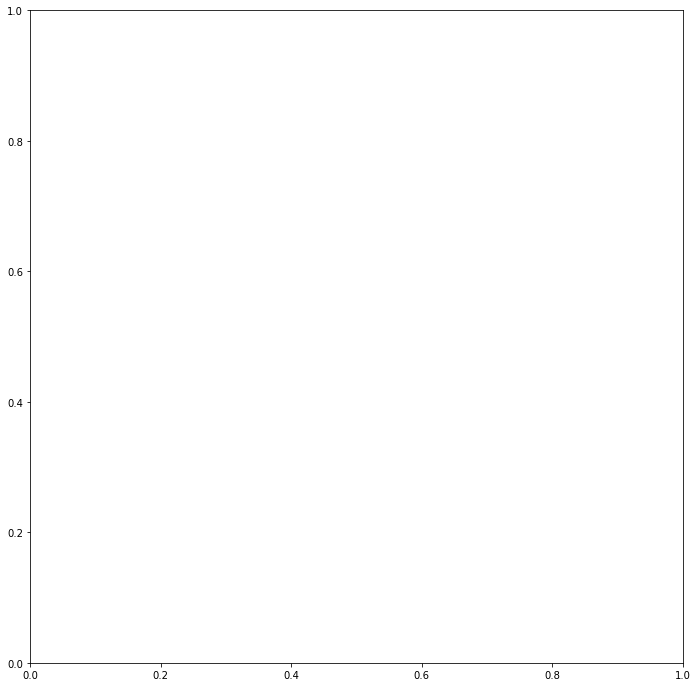

In [82]:
#plotting the data. Create a data frame, because it'll be harder to read and run other functions

test=clean.plot(figsize=(12,12),color='gainsboro', edgecolor='white')

For some reason, this data set did not print when I ran the plot command above. I tried to triage this with Chris but we could not figure out what was going wrong. However, I still got further than last time and learned how to merge variables from two different data sets together.